## 训练误差和泛化误差
- 训练误差：训练集上的误差
- 泛化误差：新数据上的误差，更关心这个

## 验证数据集和测试数据集
验证数据集：
   - 用来评估模型好坏的数据集，用来调参
   - 不要跟训练数据集混在一起（常犯错误）
测试数据集：只用一次的数据集，不参与调参

## K-折交叉验证
数据不够时使用，一般K=5或者10

## 过拟合和欠拟合
- 数据简单，模型容量高（复杂度高），过拟合
- 数据复杂，模型容量低，欠拟合
- 其他两种情况，都正常

#### 模型容量
- 拟合各种函数的能力
- 低容量的模型难以拟合训练数据
- 高容量的模型可以记住所有的训练数据
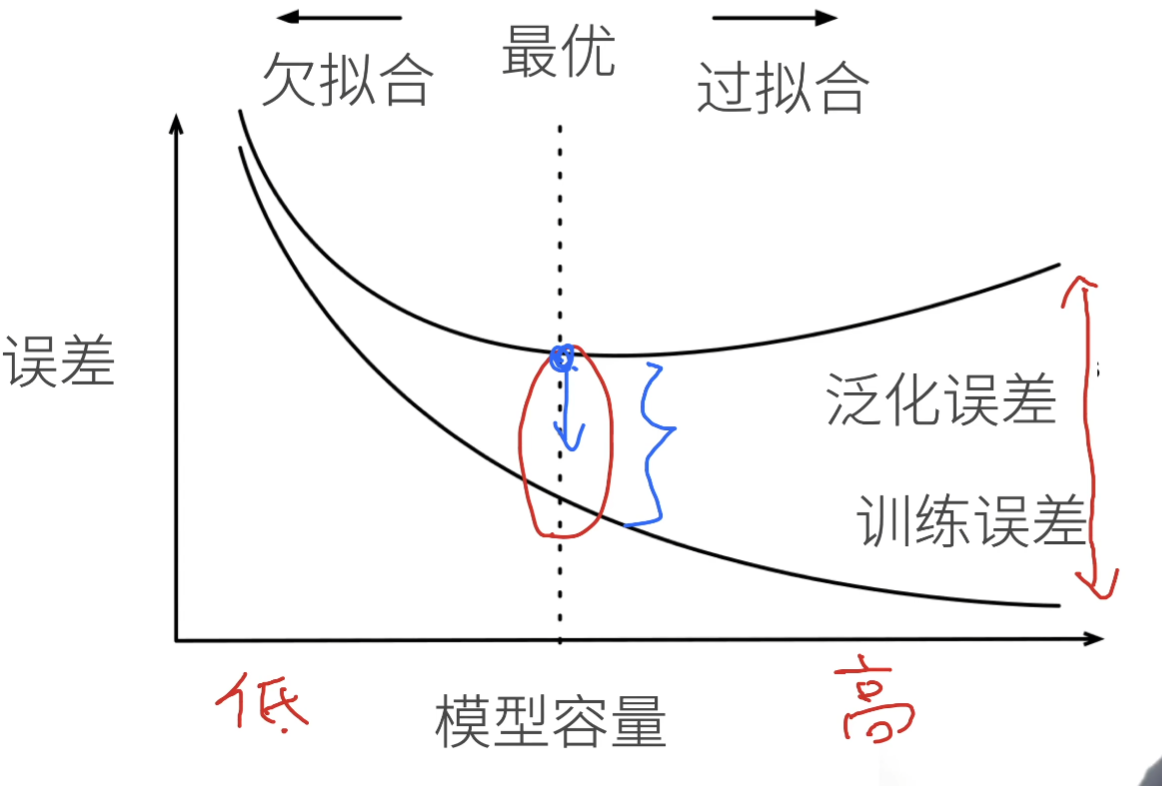
- DL核心在于先模型足够大，有点过拟合没关系，再通过手段降低过拟合

#### 估计模型容量（复杂度 ）
- 不同种类算法模型难以估计，如树模型和神经网络模型
- 给定模型类别，一般由参数个数（(d+1)*m等，1代表b）和参数值的范围(int32 float32等)确定模型容量

#### VC维
- 统计学习理论的一个核心思想
- 对于一个分类模型，VC等于一个最大的数据集的大小，不管给定何符号，都存在一个模型能对他进行完美分类
- 2维输入的感知机，VC维=3，能够分类任何三个点，但不是4个（XOR）
- 支持N维输入的感知机的vc维是N+1
- 一些多层感知机的VC维度是O（$Nlog_{2}$N）
- 但深度学习中很少用，衡量不准

#### 数据复杂度
- 样本个数
- 每个样本的元素个数
- 时间、空间结构
- 多样性

### 模型容量需要匹配数据复杂度，否则可能导致过欠拟合

# QA
#### SVM一般效果分类不错，跟NN比呢？
- SVM主要几W个数据样本点时可以用，大数据集很难训练
- SVM可以调参的就那么几个
- NN其实是一种语言，灵活性很高，拓展性很高，但是SVM就是指一种分类器而已

#### 超参数设计
- 大概率靠经验，玄学
- 推荐随机，随机100次之类的
- 最好不要网格

#### 数据不均衡问题
- 最好验证集，类别均衡，防止忽略量少的类别

#### K折交叉验证
- 多种用法，可以当做确定超参数的手段，然后确定后再去按照这个超参数训练得到模型
- 也可以直接取其中验证误差最小的或者随机选一个(此时用了多个数据集），不再重新训练，然后作为模型
- 也可以把k个模型都保留，然后实际预测时候，参考k种模型均值（如果计算可以承受的话，可以用，相当于voting，效果可能好）

#### 剪枝和蒸馏可能提高模型精度？同样模型不同初始化最后集成一定好？
- 一般剪枝和distillation,会低于原来的大模型，可能优于直接训练的小模型
- 不同模型的初始化可能由于不同模型其实都是对真实模型的近似估计，与实际模型的偏差可能固定，所以集成可能一定程度融合不同模型优点，使其偏差进一步缩小

#### 类别不均衡时，是不是先考虑测试集也是不平衡然后考虑使用平衡数据集？
- 一般首先考虑，到底不平衡的原因是什么？是到底现实真实情况就是如此，如9:1，那优先做好90%的情况，然后尽量做好剩下10%；要是只是实际的采样原因导致的不均衡，那最好保证数据均衡比如简单的直接复制10倍，保持均衡或者对小的类别添加权重

# 权重衰退（weight decay）
#### 使用均分范数作为硬性限制
- 通过限制参数值的选择范围来限制模型容量
  min l(w,b) subject $||w||^{2} \leq \theta$
  - 一般不限制偏移b(限不限制都差不多)
  - 小的$\theta$意味着更强的正则项

#### 使用均分范数作为柔性限制
- 对每个$\theta$，都可以找到$\lambda$使得之前的目标函数等价于下面
  min l(w,b) + $\lambda/2||w||^{2}$
  - 可以通过拉格朗日乘子来证明
- 超参数$\lambda$控制正则项的重要程度
   - $\lambda=0$,无作用
   - $\lambda \rightarrow\infty,w^{*} \rightarrow 0$

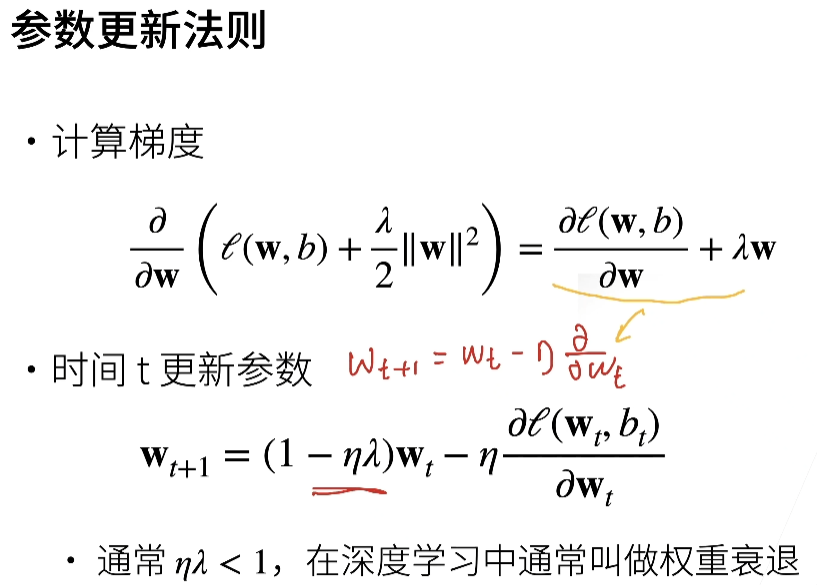

#### 总结
- 权重衰退通过L2正则项使得模型参数不会过大，从而限制模型复杂度
- 正则项权重是控制模型复杂度的超参数
- 使用最广泛的正则化技术之一
- 可能经常会在优化器中指定，一般是e-2 e-3 e-4不会到1,一般e-3默认即可，可能效果不一定高，有尝试别的方法,dropout效果可能都好点
- 可能效果很有限，一般数据有噪声，习得的w越大（实验得出，可以被证明），所以添加正则项拉回来，实际情况肯定会有噪音数据所以多少会有点效果

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
# 生成数据集, 训练数据越小，越容易过拟合
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [42]:
# 初始化参数
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

# 定义L2范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

def l1_penalty(w):
    return torch.sum(torch.abs(w))

In [52]:
# 定义训练代码
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                           xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l1_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1)  % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的l1范数为： ', torch.linalg.norm(w, ord=1).item())

w的l1范数为：  154.21160888671875


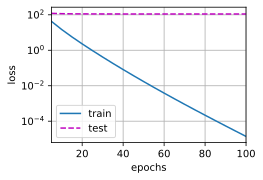

In [53]:
train(0)

w的l1范数为：  0.934137225151062


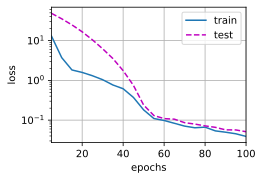

In [54]:
train(3)

w的l1范数为：  3.0372629165649414


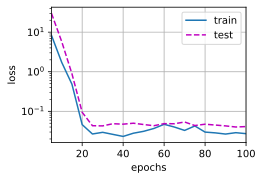

In [55]:
train(10)

In [33]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([{
        "params": net[0].weight,
        "weight_decay": wd}, {
            "params": net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1)  % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的l2范数为： ', torch.norm(net[0].weight).item())

w的l2范数为：  13.144085884094238


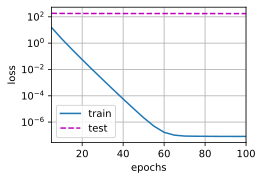

In [37]:
train_concise(0.01)

w的l2范数为：  0.05325303226709366


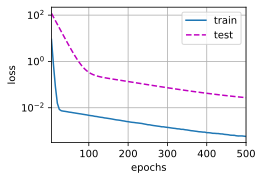

In [32]:
train_concise(3)

w的l2范数为：  0.07332795113325119


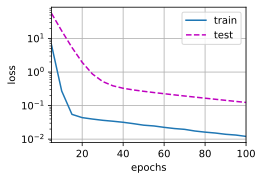

In [28]:
train_concise(10)

w的l2范数为：  0.010621107183396816


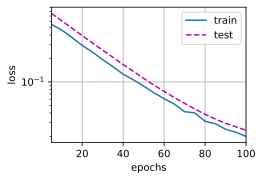

In [30]:
train_concise(100)

# 丢弃法（drop out）
#### 动机
- 一个号的模型需要对输入数据的扰动鲁棒
 - 使用有噪声的数据等价于Tikhonov正则
 - 丢弃法：在层之间加入噪音
 
#### 无偏差的加入噪音
- 对x加入噪音得到x'，希望E[x'] = x
- 丢弃法对于每个元素做如下扰动
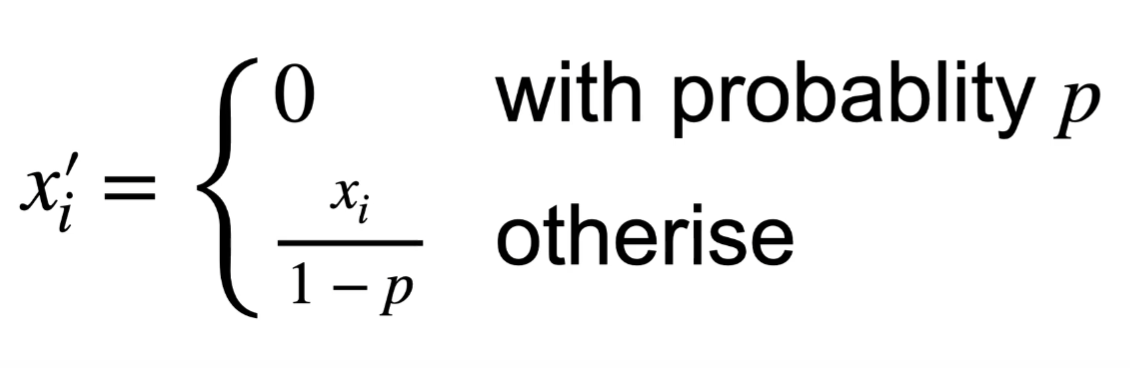

#### 如何使用（训练）
- 通常作用在隐藏全连接层的输出上
- 注意每次dropout的单元不一样，去掉一些unit，某些单元变大
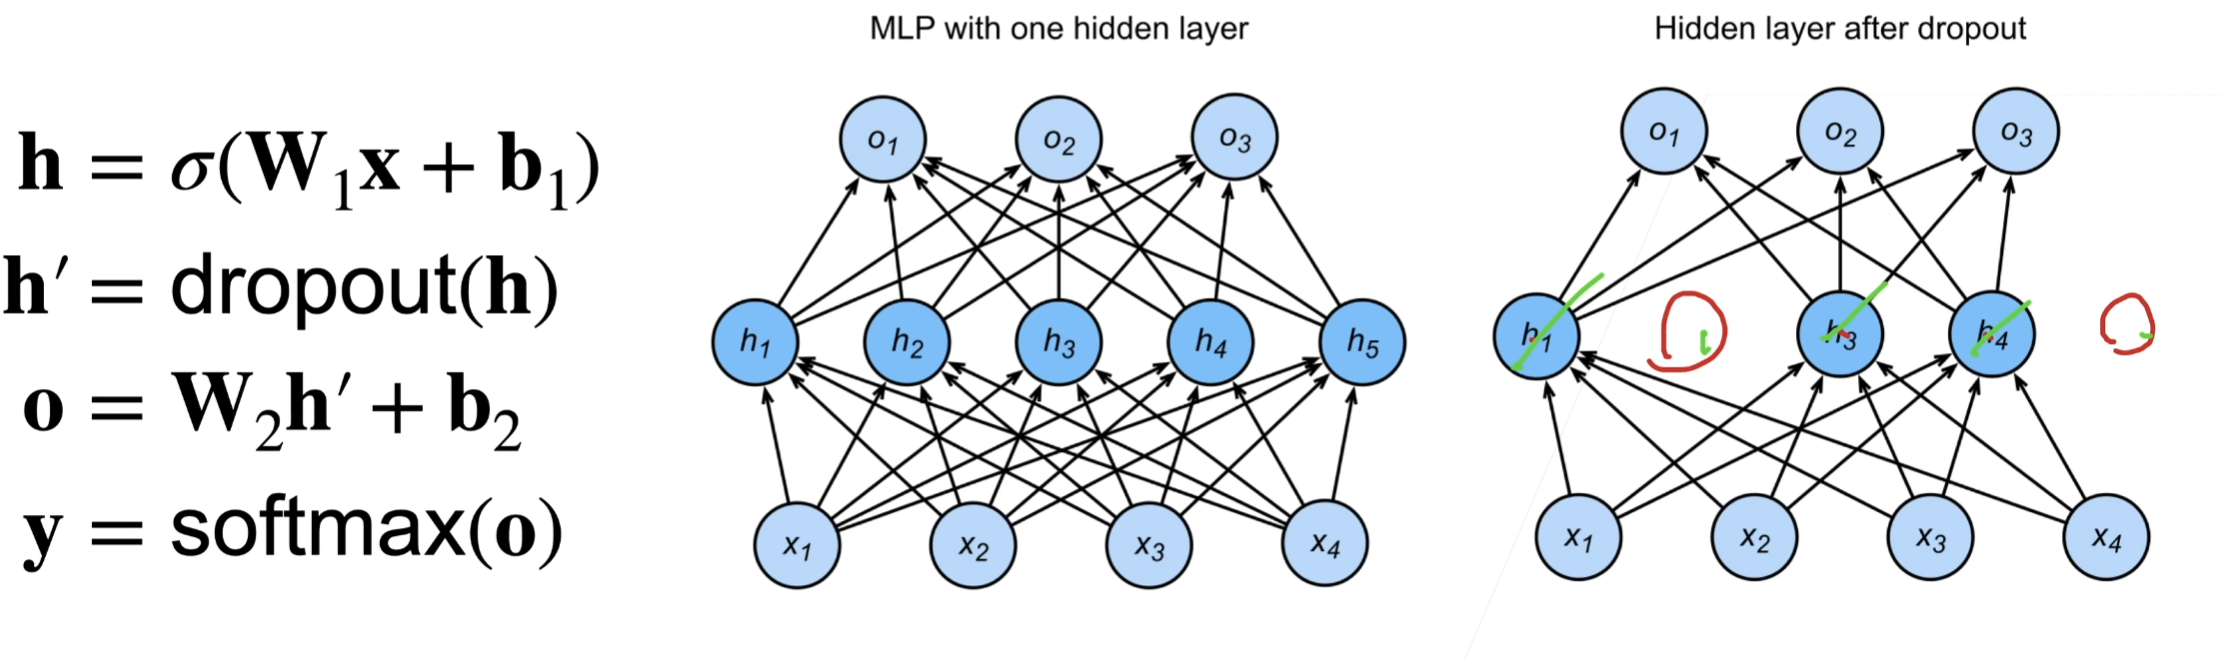

#### 推理中的丢弃法
- 正则项只在训练中使用：他们影响模型参数的更新
- 在推理过程中，丢弃法直接返回输入
  - h = dropout(h)
  - 这样也能保证确定性的输出

#### 总结
- 丢弃法将一些输出项随机置0来控制模型复杂度
- 常作用在多层感知机的隐藏层输出上
- 丢弃概率是控制模型复杂度的超参数，一般取0.1 0.5 0.9，很可能效果好于L2 norm


In [57]:
# Dropout 实现
import torch
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1:
        return torch.zeros_like(X)
    if dropout == 0:
        return X
    mask = (torch.randn(X.shape) > dropout).float()
    # X[mask] = 0 此处不使用，一般来说做乘法都比选择要好，GPU优势
    return mask * X / (1.0 - dropout)

In [60]:
(torch.randn(3) > 0.5).float()

tensor([1., 0., 0.])

In [71]:
# 测试dropout
X = torch.arange(16, dtype=torch.float32).reshape(2,8)
print(X)
print(dropout_layer(X, 0))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 24., 26.,  0.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [82]:
# 定义具有两个隐层的多层感知机，每个隐藏层含有256个单元,此时有3个层，包含输出层
# 且此时输出不做dropout
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256
dropout1, dropout2 = 0.0, 0.0
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                  is_training=True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.is_training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape(-1, num_inputs)))
        if self.is_training == True:
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.is_training == True:
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out
    
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)
        

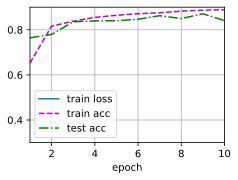

In [83]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [85]:
# 简洁实现
net = nn.Sequential(
    nn.Flatten(), nn.Linear(784, 256), nn.ReLU(),
    nn.Dropout(dropout1), nn.Linear(256, 256), nn.ReLU(),
    nn.Dropout(dropout2), nn.Linear(256, 10))

def init_weights(m):
    if(type(m) == nn.Linear):
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)
        

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.0, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.0, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

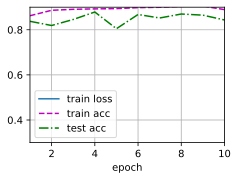

In [87]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
d2l.train_ch3??

# QA
#### dropout，如何保证结果正确性和可重复性？
- 深度学习、机器学习没有所谓的正确性可言，只有效果好坏
- 一般固定随机种子即可确保每次随机的结果一致
- 对于DL一般随机性包含3方面，
    - 权重初始化，dropout随机化，这两种可以通过随机种子固定
    - cudnn每次矩阵运算结果不一致，可以加速50-80% gpu，几乎不可以重复，涉及计算机体系结构，比如求和顺序不一致结果也不一致
- 一般没必要需要重复性，随机性有时也是好处

#### 丢弃是在训练时发生？推理呢？
- 推理不会丢弃，只在训练发生，为了获取权重参数，未丢弃的本次不参与参数更新而已
- dropout是正则项，正则的唯一目的是在模型训练的时候降低模型的复杂度，是为了更新参数，而
  模型在推理的时，参数是固定的，不会有随机性，所有推理时不会dropout
- dropout中除以(1-p)在于保证期望不变，防止训练某些单元置0，推理时候结果变大，如p=0.5，如果不除推理变两倍

#### dropout和BN区别？
 - BN是用在CNN中的，而dropout是用在全连接层，不会用在CNN层，基本没什么相关性
 - BN有点正则的味道

#### dropout 会不会使得loss曲线方差变大，不平滑？
- 一般可能看loss曲线不会按epoch（太贵了），一般多少个batch看一次，此时抖动很正常，不care
- 看最终的结果是否平滑

#### dropout 类似随机森林voting？
- 开始dropout的想法（hilton提出），确实是这样的构想，相当于每次采用子网络，然后最后做类似ensemble，预测时也dropout然后去投票或者平均，但是实际效果也一般
- 但是实验结果出来大家发现更像一种正则项

#### dropout 和权重衰减都是正则，为什么dropout效果更好，谁更常用？
- 一般weight decay更常用，卷积也可以用，transform也可以用，但是dropout只全连接用
- 一般dropout用的多可能是更好调参，一般就0.1 0.5 0.9，同时直观来说64维单层，可能128维 dropput 0.5效果更好
- 一般DL模型可以过拟合，优先保证模型够强，然后考虑添加正则项降低模型复杂度不要学偏
- 尽量少用MLP，常见CNN（一种特别MLP)